In [10]:
%run ../definitions.ipynb
plt.style.use('latex_prl')
def plt_savefig(filename, folder='plots'):
    plt.savefig(os.path.join(folder, filename + '.png'))
    plt.savefig(os.path.join(folder, filename + '.pdf'))

/home/erik/anaconda3/envs/pax/lib/python3.4/site-packages/matplotlib/style/core.py:53: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring
  "to style.  Ignoring".format(key))


In [11]:
# Rough means by-eye selection
popt_cs_rough, pcov_cs_rough = pickle.load(open('data/cs137_s1s2fit_2d_rough.pickle', 'rb'))
popt_na_rough, pcov_na_rough = pickle.load(open('data/na22_s1s2fit_2d_rough.pickle', 'rb'))

# sel0 means photopeak selection based on first-order g1, g2 computation
popt_cs_s1_sel0, perr_cs_s1_sel0, perr_syst_cs_s1_sel0 = pickle.load(open('data/cs137_s1_sel0.pickle', 'rb'))
popt_cs_s2_sel0, perr_cs_s2_sel0, perr_syst_cs_s2_sel0 = pickle.load(open('data/cs137_s2_sel0.pickle', 'rb'))
popt_na_s1_sel0, perr_na_s1_sel0, perr_syst_na_s1_sel0 = pickle.load(open('data/na22_s1_sel0.pickle', 'rb'))
popt_na_s2_sel0, perr_na_s2_sel0, perr_syst_na_s2_sel0 = pickle.load(open('data/na22_s2_sel0.pickle', 'rb'))


popt_cs_s1_sel1, perr_cs_s1_sel1, perr_syst_cs_s1_sel1 = pickle.load(open('data/cs137_s1_sel1.pickle', 'rb'))
popt_cs_s2_sel1, perr_cs_s2_sel1, perr_syst_cs_s2_sel1 = pickle.load(open('data/cs137_s2_sel1.pickle', 'rb'))
popt_na_s1_sel1, perr_na_s1_sel1, perr_syst_na_s1_sel1 = pickle.load(open('data/na22_s1_sel1.pickle', 'rb'))
popt_na_s2_sel1, perr_na_s2_sel1, perr_syst_na_s2_sel1 = pickle.load(open('data/na22_s2_sel1.pickle', 'rb'))


popt_cs_s1_sel2, perr_cs_s1_sel2, perr_syst_cs_s1_sel2 = pickle.load(open('data/cs137_s1_sel2.pickle', 'rb'))
popt_cs_s2_sel2, perr_cs_s2_sel2, perr_syst_cs_s2_sel2 = pickle.load(open('data/cs137_s2_sel2.pickle', 'rb'))
popt_na_s1_sel2, perr_na_s1_sel2, perr_syst_na_s1_sel2 = pickle.load(open('data/na22_s1_sel2.pickle', 'rb'))
popt_na_s2_sel2, perr_na_s2_sel2, perr_syst_na_s2_sel2 = pickle.load(open('data/na22_s2_sel2.pickle', 'rb'))

In [12]:
def add_errs(err0, err1):
    return np.sqrt(err0**2 + err1**2)

In [13]:
# all s1 is corrected s1, all s2 is corrected bottom s2
s1_rough  = np.array( [popt_na_rough[1], popt_cs_rough[1]] )
s2_rough  = np.array( [popt_na_rough[2], popt_cs_rough[2]] )
ds1_rough = np.array( [np.sqrt(np.diag(pcov_na_rough))[1], np.sqrt(np.diag(pcov_cs_rough))[1] ] )
ds2_rough = np.array( [np.sqrt(np.diag(pcov_na_rough))[2], np.sqrt(np.diag(pcov_cs_rough))[2] ] )

s1_sel0 = np.array( [popt_na_s1_sel0['mu'], popt_cs_s1_sel0['mu'] ])
s2_sel0 = np.array( [popt_na_s2_sel0['mu'], popt_cs_s2_sel0['mu'] ])
ds1_sel0 = np.array( [add_errs(perr_na_s1_sel0['mu'], perr_syst_na_s1_sel0), 
                      add_errs(perr_cs_s1_sel0['mu'], perr_syst_cs_s1_sel0) ])
ds2_sel0 = np.array( [add_errs(perr_na_s2_sel0['mu'], perr_syst_na_s2_sel0),
                      add_errs(perr_cs_s2_sel0['mu'], perr_syst_cs_s2_sel0)])

s1_sel1 = np.array( [popt_na_s1_sel1['mu'], popt_cs_s1_sel1['mu'] ])
s2_sel1 = np.array( [popt_na_s2_sel1['mu'], popt_cs_s2_sel1['mu'] ])
ds1_sel1 = np.array( [add_errs(perr_na_s1_sel1['mu'], perr_syst_na_s1_sel1),
                      add_errs(perr_cs_s1_sel1['mu'], perr_syst_cs_s1_sel1)])
ds2_sel1 = np.array( [add_errs(perr_na_s2_sel1['mu'], perr_syst_na_s2_sel1),
                      add_errs(perr_cs_s2_sel1['mu'], perr_syst_cs_s2_sel1)])

s1_sel2 = np.array( [popt_na_s1_sel2['mu'], popt_cs_s1_sel2['mu'] ])
s2_sel2 = np.array( [popt_na_s2_sel2['mu'], popt_cs_s2_sel2['mu'] ])
ds1_sel2 = np.array( [add_errs(perr_na_s1_sel2['mu'], perr_syst_na_s1_sel2),
                      add_errs(perr_cs_s1_sel2['mu'], perr_syst_cs_s1_sel2)])
ds2_sel2 = np.array( [add_errs(perr_na_s2_sel2['mu'], perr_syst_na_s2_sel2),
                      add_errs(perr_cs_s2_sel2['mu'], perr_syst_cs_s2_sel2)])

E   = np.array( [511, 661.6] )

In [14]:
def doke(s2_over_e, g1, g2):
    return g1/(13.7e-3) - (g1/g2) * s2_over_e


popt_doke_rough, pcov_doke_rough = scipy.optimize.curve_fit(doke, s2_rough/E, s1_rough/E, p0 = [1,1])
print('rough: ', popt_doke_rough)
pickle.dump(popt_doke_rough, open('data/doke_rough.pickle', 'wb'))

popt_doke_sel0, pcov_doke_sel0 = scipy.optimize.curve_fit(doke, s2_sel0/E, s1_sel0/E, p0 = [1,1])
print(popt_doke_sel0)
pickle.dump(popt_doke_sel0, open('data/doke_sel0.pickle', 'wb'))

popt_doke_sel1, pcov_doke_sel1 = scipy.optimize.curve_fit(doke, s2_sel1/E, s1_sel1/E, p0 = [1,1])
print(popt_doke_sel1)
pickle.dump(popt_doke_sel1, open('data/doke_sel1.pickle', 'wb'))

# sel 2
popt_doke_sel2, pcov_doke_sel2 = scipy.optimize.curve_fit(doke, s2_sel2/E, s1_sel2/E, p0 = [1,1])
print(popt_doke_sel2)
pickle.dump(popt_doke_sel2, open('data/doke_sel2.pickle', 'wb'))

rough:  [ 0.09529046  4.99485915]
[ 0.09189561  4.99432058]
[ 0.09250898  4.9457852 ]
[ 0.09811548  4.71819016]


/home/erik/anaconda3/envs/pax/lib/python3.4/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


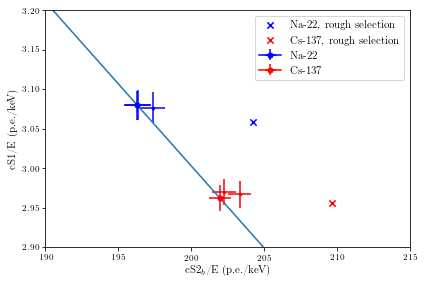

In [15]:
# plt.scatter(s2_rough[0]/E[0], s1_rough[0]/E[0], 
#              yerr = ds1_rough[0]/E[0], xerr=ds2_rough[0]/E[0], markersize=5,
#              label='Na-22, rough selection', marker='x')
plt.scatter(s2_rough[0]/E[0], s1_rough[0]/E[0], 
             s=40, color='blue',
             label='Na-22, rough selection', marker='x')
plt.errorbar(s2_sel0[0]/E[0], s1_sel0[0]/E[0], 
             yerr = ds1_sel0[0]/E[0], xerr=ds2_sel0[0]/E[0], marker='.', markersize=5, color='blue')
plt.errorbar(s2_sel1[0]/E[0], s1_sel1[0]/E[0], 
             yerr = ds1_sel1[0]/E[0], xerr=ds2_sel1[0]/E[0], marker='.', markersize=5, color='blue')
plt.errorbar(s2_sel2[0]/E[0], s1_sel2[0]/E[0], label= 'Na-22', 
             yerr = ds1_sel2[0]/E[0], xerr=ds2_sel2[0]/E[0], marker='.', markersize=10, color='blue')


# plt.errorbar(s2_rough[1]/E[1], s1_rough[1]/E[1], label= 'Cs-137, rough selection', 
#              yerr = ds1_rough[1]/E[1], xerr=ds2_rough[1]/E[1])
plt.scatter(s2_rough[1]/E[1], s1_rough[1]/E[1], 
             s=40, color='red',
             label='Cs-137, rough selection', marker='x')
plt.errorbar(s2_sel0[1]/E[1], s1_sel0[1]/E[1],
             yerr = ds1_sel0[1]/E[1], xerr=ds2_sel0[1]/E[1], color='red', marker='.', markersize=5,)
plt.errorbar(s2_sel1[1]/E[1], s1_sel1[1]/E[1], 
             yerr = ds1_sel1[1]/E[1], xerr=ds2_sel1[1]/E[1], color='red', marker='.', markersize=5,)
plt.errorbar(s2_sel2[1]/E[1], s1_sel2[1]/E[1], label= 'Cs-137', 
             yerr = ds1_sel2[1]/E[1], xerr=ds2_sel2[1]/E[1], marker='.', markersize=10, color='red')


x_plot = np.linspace(0, 400, 20)
plt.plot(x_plot, doke(x_plot, *popt_doke_sel2))

# for _popt in popts:
#     plt.plot(x_plot, doke(x_plot, *_popt), color='gray', alpha=0.2)
    

# # Full view setting
# plt.xlim(0, 350)
# plt.ylim(0,7)
# # Zoom setting
plt.xlim(190, 215)
plt.ylim(2.9,3.2)
plt.xlabel('cS2$_b$/E (p.e./keV)')
plt.ylabel('cS1/E (p.e./keV)')
plt.legend(loc='upper right')
plt_savefig('doke_new')


In [16]:
# error estimate

In [17]:
def lin(x, a0, a1):
    return a0 + a1 * x

In [18]:
n_it = 1000
popts = []
popts_lin = []
for it in range(n_it):
    _s1 = np.array([np.random.normal(loc = _s1_entry, scale=_ds1_entry) 
                    for _s1_entry, _ds1_entry in zip(s1_sel2, ds1_sel2)])
    _s2 = np.array([np.random.normal(loc = _s2_entry, scale=_ds2_entry) 
                    for _s2_entry, _ds2_entry in zip(s2_sel2, ds2_sel2)])
    _popt, _ = scipy.optimize.curve_fit(doke, _s2/E, _s1/E, p0 = [0.1,5])
    popts.append(_popt)
    _popt, _ = scipy.optimize.curve_fit(lin, _s2/E, _s1/E, p0 = [0.1,5])
    popts_lin.append(_popt)

/home/erik/anaconda3/envs/pax/lib/python3.4/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [19]:
popts_lin = np.array(popts_lin)
popts = np.array(popts)

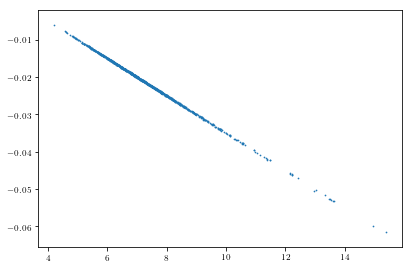

In [20]:
plt.scatter(popts_lin[:, 0], popts_lin[:, 1], marker='.', s = 2)
plt.xlabel('')

(4, 7)

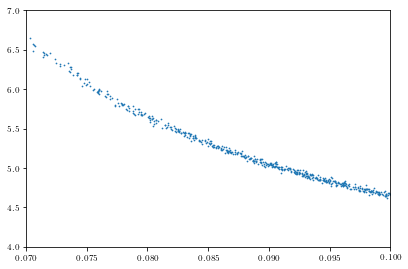

In [21]:
plt.scatter(popts[:,0], popts[:,1], marker='.', s = 2)
plt.xlim(0.07, 0.10)
plt.ylim(4, 7)

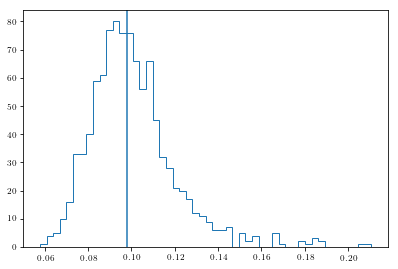

In [22]:
plt.hist(popts[:, 0], bins=50, histtype='step')
g1_err = (np.std(popts[:, 0]))
plt.axvline(popt_doke_sel2[0])

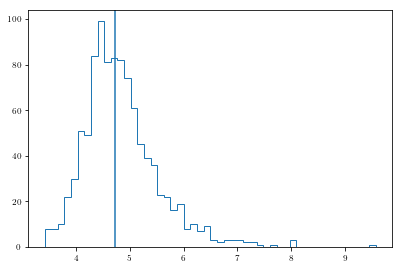

In [23]:
plt.hist(popts[:, 1], bins=50, histtype='step')
g2_err = (np.std(popts[:, 1]))
plt.axvline(popt_doke_sel2[1])

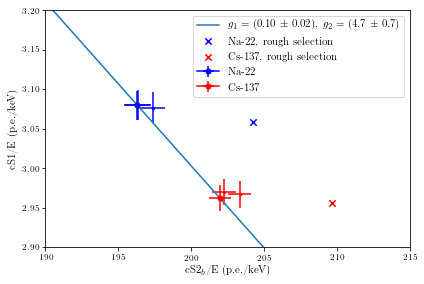

In [24]:
# plt.scatter(s2_rough[0]/E[0], s1_rough[0]/E[0], 
#              yerr = ds1_rough[0]/E[0], xerr=ds2_rough[0]/E[0], markersize=5,
#              label='Na-22, rough selection', marker='x')
plt.scatter(s2_rough[0]/E[0], s1_rough[0]/E[0], 
             s=40, color='blue',
             label='Na-22, rough selection', marker='x')
plt.errorbar(s2_sel0[0]/E[0], s1_sel0[0]/E[0], 
             yerr = ds1_sel0[0]/E[0], xerr=ds2_sel0[0]/E[0], marker='.', markersize=5, color='blue')
plt.errorbar(s2_sel1[0]/E[0], s1_sel1[0]/E[0], 
             yerr = ds1_sel1[0]/E[0], xerr=ds2_sel1[0]/E[0], marker='.', markersize=5, color='blue')
plt.errorbar(s2_sel2[0]/E[0], s1_sel2[0]/E[0], label= 'Na-22', 
             yerr = ds1_sel2[0]/E[0], xerr=ds2_sel2[0]/E[0], marker='.', markersize=10, color='blue')


# plt.errorbar(s2_rough[1]/E[1], s1_rough[1]/E[1], label= 'Cs-137, rough selection', 
#              yerr = ds1_rough[1]/E[1], xerr=ds2_rough[1]/E[1])
plt.scatter(s2_rough[1]/E[1], s1_rough[1]/E[1], 
             s=40, color='red',
             label='Cs-137, rough selection', marker='x')
plt.errorbar(s2_sel0[1]/E[1], s1_sel0[1]/E[1],
             yerr = ds1_sel0[1]/E[1], xerr=ds2_sel0[1]/E[1], color='red', marker='.', markersize=5, )
plt.errorbar(s2_sel1[1]/E[1], s1_sel1[1]/E[1], 
             yerr = ds1_sel1[1]/E[1], xerr=ds2_sel1[1]/E[1], color='red', marker='.', markersize=5,)
plt.errorbar(s2_sel2[1]/E[1], s1_sel2[1]/E[1], label= 'Cs-137', 
             yerr = ds1_sel2[1]/E[1], xerr=ds2_sel2[1]/E[1], marker='.', markersize=10, color='red')


x_plot = np.linspace(0, 400, 20)
plt.plot(x_plot, doke(x_plot, *popt_doke_sel2), 
         label='$g_1 = $ (%.2f $\pm$ %.2f), $g_2 = $ (%.1f $\pm$ %.1f)' % (popt_doke_sel2[0], g1_err,
                                                                            popt_doke_sel2[1], g2_err))

# for _popt in popts:
#     plt.plot(x_plot, doke(x_plot, *_popt), color='gray', alpha=0.2)
    

# # Full view setting
# plt.xlim(0, 350)
# plt.ylim(0,7)
# # Zoom setting
plt.xlim(190, 215)
plt.ylim(2.9,3.2)
plt.xlabel('cS2$_b$/E (p.e./keV)')
plt.ylabel('cS1/E (p.e./keV)')
plt.legend(loc='upper right')
plt_savefig('doke_new')


NameError: name 'popt_doke' is not defined

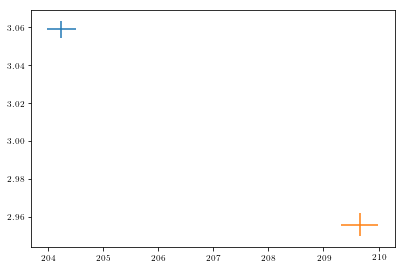

In [25]:
plt.errorbar(s2_rough[0]/E[0], s1_rough[0]/E[0], label= 'Na-22 (511 keV)', 
             yerr = ds1_rough[0]/E[0], xerr=ds2_rough[0]/E[0])
plt.errorbar(s2_rough[1]/E[1], s1_rough[1]/E[1], label= 'Cs-137 (662 keV)', 
             yerr = ds1_rough[1]/E[1], xerr=ds2_rough[1]/E[1])

x_plot = np.linspace(0, 400, 200)
plt.plot(x_plot, doke(x_plot, *popt_doke))
# Full view setting
plt.xlim(0, 350)
plt.ylim(0,7)
# Zoom setting
plt.xlim(185, 196)
plt.ylim(2.9,3.1)
plt.xlabel('cS2$_b$/E (p.e./keV)')
plt.ylabel('cS1/E (p.e./keV)')
plt.text(188.5, 3.06, '$g_1$ = 0.093, $g_2$ = 4.68', rotation = -36, size=16)
plt.legend()
plt_savefig('doke')

### Old crap as of June 2017

In [ ]:
# cs1_per_E =      [ 1156.6 / 511., 1431.9/661.6]
# bs2_per_E =      [64741.3 / 511.,  86757.7/661.6]
# E  =             [511, 661.6]
# res_ces =        np.array([0.062807, 0.055436781])
# res_s1 =         np.array([0.16675798276, 0.15348183740])
# res_s2 =         np.array([0.1305540, 0.09745874])

In [ ]:
### SECOND ITERATION
# From fits
s1  = [1154.2044765929927, 1423.2931807093228, 2594.909767882044]
ds1 = [2.785102481203028, 4.430965817882083,1.3396457855016182]
s2 = [64617.9, 86374.33003719049, 136825.52310391146]
ds2 = [127.885, 203.01244441931775, 716.6131730234451]

# Literature
energies = [511, 661.6, 1118.1]

# Derived values
s1_per_e = [_s1/_e for _s1, _e in zip(s1, energies)]
ds1_per_e = [_ds1/_e for _ds1, _e in zip(ds1, energies)]
s2_per_e = [_s2/_e for _s2, _e in zip(s2, energies)]
ds2_per_e = [_ds2/_e for _ds2, _e in zip(ds2, energies)]

### g1, g2, and the doke plot

In [ ]:
# Is it overkill to fit a line to two points? Well, yes, it most certainly is! 
# So why am I doing it? I have hope to add a third point somewhere in the future....
def p1(x, a0, a1):
    return a0 + a1 * x

def doke(s2_over_e, g1, g2):
    return g1/(13.7e-3) - (g1/g2) * s2_over_e

# def 

popt, pcov = scipy.optimize.curve_fit(p1, s2_per_e, s1_per_e, p0=[4, -0.01])
popt2, pcov2 = scipy.optimize.curve_fit(doke, s2_per_e, s1_per_e, p0=[1, 1])
popt3, pcov3 = scipy.optimize.curve_fit(doke, s2_per_e, s1_per_e, p0=popt2, sigma = ds1_per_e)

In [ ]:
popt3

In [ ]:
x_plot = np.linspace(0, 200, 10)
plt.plot(x_plot, doke(x_plot, *popt2), ls='--', color='gray', lw=1, 
         label='g1 = %.3f, g2 = %.2f' % (popt2[0], popt2[1]))
plt.plot(x_plot, doke(x_plot, *popt3), ls='--', color='gray', lw=2, 
         label='g1 = %.3f, g2 = %.2f' % (popt3[0], popt3[1]))
plt.scatter(bs2_per_E[0], cs1_per_E[0], color='blue', label='Na-22  (511 keV)')
plt.scatter(bs2_per_E[1], cs1_per_E[1], color='red', label='Cs-137 (662 keV)')
plt.xlabel('cS2bottom/E (p.e./keV)')
plt.ylabel('cS1/E (p.e./keV)')
plt.legend(loc='lower left')
plt.xlim(0, 200)
plt.ylim(0, 5)
plt.title('@ 0.5 kV/cm')


plt.errorbar(s2_per_e, s1_per_e, xerr = ds2_per_e, yerr= ds1_per_e, ls='None', marker='.', markersize=5)
# plt.xlim(120, 135)
# plt.ylim(2, 2.4)
# plt.savefig('plots/na_vs_cs_doke_new.png')

plt.show()

In [ ]:
pcov3

In [ ]:
np.sqrt(np.diag(pcov3))

### Energy resolutions

In [ ]:
def err_v_e(e, e0, e1):
    return e0  + e1 * np.sqrt(1/e)

In [ ]:
plt.scatter(E, 100*res_ces, color='red', label='CES')
plt.scatter(E, 100*res_s1, color='blue', label='S1')
plt.scatter(E, 100*res_s2, color='green', label='S2')

popt_err_s1, _ = scipy.optimize.curve_fit(err_v_e, energies,  100*res_s1, p0=[10, 200])
popt_err_s2, _ = scipy.optimize.curve_fit(err_v_e, energies,  100*res_s2, p0=[10, 200])

x_plot = np.linspace(0, 1200, 100)
# plt.plot(x_plot, err_v_e(x_plot, 10, 200))
plt.plot(x_plot, err_v_e(x_plot, *popt_err_s1))
plt.plot(x_plot, err_v_e(x_plot, *popt_err_s2))




plt.xlabel('Energy (keV)')
plt.ylabel('Energy resolution (%)')
plt.ylim(0,20)
plt.xlim(0, 1200)
plt.legend(loc='lower left')

In [ ]:
def get_compton_energy(e):
    '''
    
    https://en.wikipedia.org/wiki/Compton_edge (but I also checked other places, don't worry)
    '''
    return e*(1-1/(1+(2*e/511.)))

In [ ]:
get_compton_energy(1332.5)

In [ ]:
err_v_e(1118, *popt_err_s2)

In [ ]:
popt_err_s1